In [ ]:
# Run these 2 following lines when running on Google Colab environment
!git clone https://github.com/tripercy/pka-deeplearning-midterm.git
%cd pka-deeplearning-midterm

Cloning into 'pka-deeplearning-midterm'...
remote: Enumerating objects: 146, done.
remote: Counting objects: 100% (146/146), done.
remote: Compressing objects: 100% (98/98), done.
remote: Total 146 (delta 73), reused 113 (delta 40), pack-reused 0 (from 0)
Receiving objects: 100% (146/146), 85.21 KiB | 3.55 MiB/s, done.
Resolving deltas: 100% (73/73), done.
/content/pka-deeplearning-midterm


In [ ]:
!cd data && bash download.sh

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 41.7M  100 41.7M    0     0  33.3M      0  0:00:01  0:00:01 --:--:--  116M
Archive:  genre-classification-dataset-imdb.zip
  inflating: Genre Classification Dataset/description.txt  
  inflating: Genre Classification Dataset/test_data.txt  
  inflating: Genre Classification Dataset/test_data_solution.txt  
  inflating: Genre Classification Dataset/train_data.txt  
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 5726k  100 5726k    0     0  7744k      0 --:--:-- --:--:-- --:--:-- 24.3M
Archive:  bbc-full-text-document-classification.zip
  inflating: bbc-fulltex

In [ ]:
from utils.data_loader import *
base_path = "data/bbc"
x, y, labels = read_bbc(base_path)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from utils.preprocess import *
from utils.vectorizer import *
from utils.transformer_utils import *
import gensim.downloader as api

In [ ]:
embedding_model = api.load("glove-wiki-gigaword-50")

[==================================================] 100.0% 66.0/66.0MB downloaded


In [ ]:
preprocessed = preprocess_ds(x)
vectorized = vectorize_ds(preprocessed, embedding_model, 100)

In [ ]:
pos_embedded = add_positional_encoding(vectorized)

In [ ]:
x_train, y_train, x_test, y_test = train_test_split(pos_embedded, y, 0.8)

In [ ]:
# truncate train data for testing
# x_train = x_train[:500]
# y_train = y_train[:500]

In [ ]:
from model import base_model
from model.layers.activation import *
from model.layers.loss_function import *
from model.layers import dense_layer, pooling_layer, input_layer, transformer_encoder_layer
from model.optimizers import gradient_descent, adam_optimizer

In [35]:
inp = input_layer.InputLayer(50)

encoder = transformer_encoder_layer.TransformerEncoderLayer(inp, 10, 1)

avg = pooling_layer.AverageLayer(encoder)
out = dense_layer.DenseLayer(avg, 5, softmax_forward, softmax_backward)

nn_model = base_model.BaseModel(
    inp, out,
    32,
    adam_optimizer.AdamOpt(alpha=0.001),
    cross_entropy_loss, cross_entropy_grad)

In [36]:
nn_model.reset()
nn_model.fit(x_train, y_train, epochs=100)

Epoch 1/100


100%|██████████| 63/63.0 [00:14<00:00,  4.23it/s]


Loss: 1.5973647788918062
Epoch 2/100


100%|██████████| 63/63.0 [00:14<00:00,  4.22it/s]


Loss: 1.4187553485573006
Epoch 3/100


100%|██████████| 63/63.0 [00:14<00:00,  4.28it/s]


Loss: 1.324025349255257
Epoch 4/100


100%|██████████| 63/63.0 [00:14<00:00,  4.21it/s]


Loss: 1.2489410384307444
Epoch 5/100


100%|██████████| 63/63.0 [00:15<00:00,  4.11it/s]


Loss: 1.1875930861418742
Epoch 6/100


100%|██████████| 63/63.0 [00:15<00:00,  4.07it/s]


Loss: 1.1372449659141544
Epoch 7/100


100%|██████████| 63/63.0 [00:14<00:00,  4.32it/s]


Loss: 1.0959040017707853
Epoch 8/100


100%|██████████| 63/63.0 [00:15<00:00,  3.98it/s]


Loss: 1.0617996359005135
Epoch 9/100


100%|██████████| 63/63.0 [00:14<00:00,  4.24it/s]


Loss: 1.0333348619296776
Epoch 10/100


100%|██████████| 63/63.0 [00:14<00:00,  4.23it/s]


Loss: 1.00916860756226
Epoch 11/100


100%|██████████| 63/63.0 [00:15<00:00,  4.08it/s]


Loss: 0.9882586093253949
Epoch 12/100


100%|██████████| 63/63.0 [00:15<00:00,  4.18it/s]


Loss: 0.9698385061039837
Epoch 13/100


100%|██████████| 63/63.0 [00:14<00:00,  4.31it/s]


Loss: 0.9533586334352746
Epoch 14/100


100%|██████████| 63/63.0 [00:14<00:00,  4.23it/s]


Loss: 0.938435076772115
Epoch 15/100


100%|██████████| 63/63.0 [00:14<00:00,  4.27it/s]


Loss: 0.9247900566690632
Epoch 16/100


100%|██████████| 63/63.0 [00:14<00:00,  4.25it/s]


Loss: 0.9122214517048411
Epoch 17/100


100%|██████████| 63/63.0 [00:15<00:00,  4.00it/s]


Loss: 0.9005780817206186
Epoch 18/100


100%|██████████| 63/63.0 [00:14<00:00,  4.20it/s]


Loss: 0.8897457975520799
Epoch 19/100


100%|██████████| 63/63.0 [00:14<00:00,  4.23it/s]


Loss: 0.8796326817968227
Epoch 20/100


100%|██████████| 63/63.0 [00:14<00:00,  4.20it/s]


Loss: 0.870165568837138
Epoch 21/100


100%|██████████| 63/63.0 [00:14<00:00,  4.22it/s]


Loss: 0.8612844756622073
Epoch 22/100


100%|██████████| 63/63.0 [00:14<00:00,  4.21it/s]


Loss: 0.8529334254478171
Epoch 23/100


100%|██████████| 63/63.0 [00:15<00:00,  3.98it/s]


Loss: 0.8450681556198764
Epoch 24/100


100%|██████████| 63/63.0 [00:14<00:00,  4.26it/s]


Loss: 0.837648125425823
Epoch 25/100


100%|██████████| 63/63.0 [00:14<00:00,  4.29it/s]


Loss: 0.8306392637805193
Epoch 26/100


100%|██████████| 63/63.0 [00:15<00:00,  3.99it/s]


Loss: 0.8240104037483299
Epoch 27/100


100%|██████████| 63/63.0 [00:14<00:00,  4.24it/s]


Loss: 0.8177332908065569
Epoch 28/100


100%|██████████| 63/63.0 [00:15<00:00,  4.10it/s]


Loss: 0.811780920950039
Epoch 29/100


100%|██████████| 63/63.0 [00:15<00:00,  4.14it/s]


Loss: 0.806129278311241
Epoch 30/100


100%|██████████| 63/63.0 [00:14<00:00,  4.24it/s]


Loss: 0.8007565436316768
Epoch 31/100


100%|██████████| 63/63.0 [00:14<00:00,  4.22it/s]


Loss: 0.79564473750955
Epoch 32/100


100%|██████████| 63/63.0 [00:14<00:00,  4.23it/s]


Loss: 0.7907748591789914
Epoch 33/100


100%|██████████| 63/63.0 [00:14<00:00,  4.21it/s]


Loss: 0.7861305918809337
Epoch 34/100


100%|██████████| 63/63.0 [00:15<00:00,  4.07it/s]


Loss: 0.781695576688289
Epoch 35/100


100%|██████████| 63/63.0 [00:14<00:00,  4.22it/s]


Loss: 0.7774532980576966
Epoch 36/100


100%|██████████| 63/63.0 [00:14<00:00,  4.25it/s]


Loss: 0.7733916522768262
Epoch 37/100


100%|██████████| 63/63.0 [00:14<00:00,  4.28it/s]


Loss: 0.7695005861376993
Epoch 38/100


100%|██████████| 63/63.0 [00:14<00:00,  4.26it/s]


Loss: 0.7657664831175778
Epoch 39/100


100%|██████████| 63/63.0 [00:14<00:00,  4.29it/s]


Loss: 0.762180356136356
Epoch 40/100


100%|██████████| 63/63.0 [00:15<00:00,  4.18it/s]


Loss: 0.758732952898106
Epoch 41/100


100%|██████████| 63/63.0 [00:15<00:00,  4.05it/s]


Loss: 0.755415712325244
Epoch 42/100


100%|██████████| 63/63.0 [00:14<00:00,  4.23it/s]


Loss: 0.7522224636017909
Epoch 43/100


100%|██████████| 63/63.0 [00:15<00:00,  4.01it/s]


Loss: 0.7491442365877331
Epoch 44/100


100%|██████████| 63/63.0 [00:14<00:00,  4.23it/s]


Loss: 0.7461734653261132
Epoch 45/100


100%|██████████| 63/63.0 [00:14<00:00,  4.29it/s]


Loss: 0.7433039000970543
Epoch 46/100


100%|██████████| 63/63.0 [00:15<00:00,  4.17it/s]


Loss: 0.740529845591717
Epoch 47/100


100%|██████████| 63/63.0 [00:15<00:00,  4.12it/s]


Loss: 0.7378458609005143
Epoch 48/100


100%|██████████| 63/63.0 [00:14<00:00,  4.25it/s]


Loss: 0.7352471895628684
Epoch 49/100


100%|██████████| 63/63.0 [00:14<00:00,  4.23it/s]


Loss: 0.732729960551743
Epoch 50/100


100%|██████████| 63/63.0 [00:14<00:00,  4.22it/s]


Loss: 0.730289354680073
Epoch 51/100


100%|██████████| 63/63.0 [00:14<00:00,  4.27it/s]


Loss: 0.727921463741825
Epoch 52/100


100%|██████████| 63/63.0 [00:14<00:00,  4.22it/s]


Loss: 0.7256224027000843
Epoch 53/100


100%|██████████| 63/63.0 [00:15<00:00,  4.03it/s]


Loss: 0.723388539813823
Epoch 54/100


100%|██████████| 63/63.0 [00:14<00:00,  4.22it/s]


Loss: 0.7212153366089298
Epoch 55/100


100%|██████████| 63/63.0 [00:14<00:00,  4.28it/s]


Loss: 0.7191012030765725
Epoch 56/100


100%|██████████| 63/63.0 [00:14<00:00,  4.24it/s]


Loss: 0.7170441129139674
Epoch 57/100


100%|██████████| 63/63.0 [00:15<00:00,  4.20it/s]


Loss: 0.7150414406839133
Epoch 58/100


100%|██████████| 63/63.0 [00:15<00:00,  4.17it/s]


Loss: 0.7130895830335526
Epoch 59/100


100%|██████████| 63/63.0 [00:15<00:00,  4.04it/s]


Loss: 0.71118715231247
Epoch 60/100


100%|██████████| 63/63.0 [00:14<00:00,  4.26it/s]


Loss: 0.7093304887612926
Epoch 61/100


100%|██████████| 63/63.0 [00:15<00:00,  3.97it/s]


Loss: 0.7075178361241908
Epoch 62/100


100%|██████████| 63/63.0 [00:14<00:00,  4.21it/s]


Loss: 0.7057478730332231
Epoch 63/100


100%|██████████| 63/63.0 [00:14<00:00,  4.32it/s]


Loss: 0.704019079789523
Epoch 64/100


100%|██████████| 63/63.0 [00:15<00:00,  4.06it/s]


Loss: 0.7023303856019342
Epoch 65/100


100%|██████████| 63/63.0 [00:15<00:00,  4.17it/s]


Loss: 0.7006793510117704
Epoch 66/100


100%|██████████| 63/63.0 [00:14<00:00,  4.24it/s]


Loss: 0.6990638925646522
Epoch 67/100


100%|██████████| 63/63.0 [00:14<00:00,  4.24it/s]


Loss: 0.6974834500733097
Epoch 68/100


100%|██████████| 63/63.0 [00:14<00:00,  4.23it/s]


Loss: 0.6959357144419493
Epoch 69/100


100%|██████████| 63/63.0 [00:14<00:00,  4.25it/s]


Loss: 0.6944207472101962
Epoch 70/100


100%|██████████| 63/63.0 [00:15<00:00,  4.02it/s]


Loss: 0.6929375766500455
Epoch 71/100


100%|██████████| 63/63.0 [00:15<00:00,  4.20it/s]


Loss: 0.6914832541235723
Epoch 72/100


100%|██████████| 63/63.0 [00:14<00:00,  4.22it/s]


Loss: 0.6900579309726316
Epoch 73/100


100%|██████████| 63/63.0 [00:14<00:00,  4.29it/s]


Loss: 0.6886604332801218
Epoch 74/100


100%|██████████| 63/63.0 [00:15<00:00,  4.18it/s]


Loss: 0.6872901533148172
Epoch 75/100


100%|██████████| 63/63.0 [00:14<00:00,  4.21it/s]


Loss: 0.6859459120042677
Epoch 76/100


100%|██████████| 63/63.0 [00:15<00:00,  4.03it/s]


Loss: 0.6846265065505206
Epoch 77/100


100%|██████████| 63/63.0 [00:14<00:00,  4.24it/s]


Loss: 0.683330024360456
Epoch 78/100


100%|██████████| 63/63.0 [00:15<00:00,  3.98it/s]


Loss: 0.6820570485491693
Epoch 79/100


100%|██████████| 63/63.0 [00:14<00:00,  4.30it/s]


Loss: 0.6808070149278092
Epoch 80/100


100%|██████████| 63/63.0 [00:14<00:00,  4.22it/s]


Loss: 0.6795790533565114
Epoch 81/100


100%|██████████| 63/63.0 [00:14<00:00,  4.22it/s]


Loss: 0.6783725518075007
Epoch 82/100


100%|██████████| 63/63.0 [00:15<00:00,  3.99it/s]


Loss: 0.6771865633799643
Epoch 83/100


100%|██████████| 63/63.0 [00:14<00:00,  4.22it/s]


Loss: 0.6760206817876353
Epoch 84/100


100%|██████████| 63/63.0 [00:14<00:00,  4.21it/s]


Loss: 0.6748740263898311
Epoch 85/100


100%|██████████| 63/63.0 [00:14<00:00,  4.20it/s]


Loss: 0.6737472470639304
Epoch 86/100


100%|██████████| 63/63.0 [00:14<00:00,  4.23it/s]


Loss: 0.6726391221277553
Epoch 87/100


100%|██████████| 63/63.0 [00:15<00:00,  4.17it/s]


Loss: 0.6715486944482031
Epoch 88/100


100%|██████████| 63/63.0 [00:15<00:00,  4.01it/s]


Loss: 0.6704750074912647
Epoch 89/100


100%|██████████| 63/63.0 [00:14<00:00,  4.21it/s]


Loss: 0.6694182669470063
Epoch 90/100


100%|██████████| 63/63.0 [00:14<00:00,  4.21it/s]


Loss: 0.6683788066040394
Epoch 91/100


100%|██████████| 63/63.0 [00:14<00:00,  4.29it/s]


Loss: 0.6673555013380124
Epoch 92/100


100%|██████████| 63/63.0 [00:14<00:00,  4.25it/s]


Loss: 0.6663483767011996
Epoch 93/100


100%|██████████| 63/63.0 [00:15<00:00,  4.17it/s]


Loss: 0.6653571706227569
Epoch 94/100


100%|██████████| 63/63.0 [00:15<00:00,  4.06it/s]


Loss: 0.6643799827124017
Epoch 95/100


100%|██████████| 63/63.0 [00:14<00:00,  4.21it/s]


Loss: 0.6634170896969713
Epoch 96/100


100%|██████████| 63/63.0 [00:15<00:00,  3.96it/s]


Loss: 0.6624686580604083
Epoch 97/100


100%|██████████| 63/63.0 [00:14<00:00,  4.28it/s]


Loss: 0.6615347078122933
Epoch 98/100


100%|██████████| 63/63.0 [00:14<00:00,  4.24it/s]


Loss: 0.6606140332782959
Epoch 99/100


100%|██████████| 63/63.0 [00:15<00:00,  4.07it/s]


Loss: 0.659706739626004
Epoch 100/100


100%|██████████| 63/63.0 [00:15<00:00,  4.15it/s]

Loss: 0.6588121306739242


In [25]:
import matplotlib.pyplot as plt

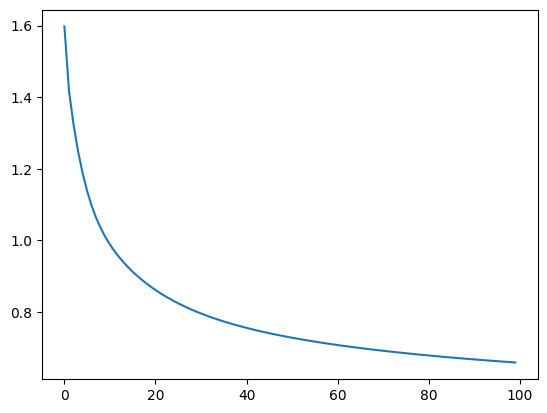

In [37]:
plt.plot(nn_model.history)

In [38]:
nn_model.evaluate(x_test, y_test)

(0.7252252252252253,
 array([0.62036387, 0.47620932, 0.53453035, 0.76291612, 0.69285123]),
 array([0.67664325, 0.62843252, 0.56237583, 0.77586884, 0.44914359]))

In [ ]:
sample = """
Johnson too strong for GB runners

Britain's Kathy Butler and Hayley Yelling were no match for Benita Johnson in
the 51st Cross International Zornotza in Amorebieta, Spain.

Butler and Yelling finished fourth and fifth as Australian world champion
Johnson romped to a five-second victory in the 6km race ahead of Edith Masai.
Masai's fellow Kenyan Alice Timbilil finished third. Johnson said: "I ran
comfortably for the first 3km and then I tried to leave the others but it wasn't
an easy task." Butler clocked a time of 22 minutes 45 seconds - 22secs behind
the winner but four ahead of Yelling, who last month succeeded Paula Radcliffe
as European champion. Johnson, will be one of the star attractions at the Great
EdinburghInternational Cross Country on 15 January.
"""

In [ ]:
sample_preprocessed = preprocess_sequence(sample)
sample_vectorized = vectorize_sequence(sample_preprocessed, embedding_model, 100)

In [ ]:
sample_x = np.expand_dims(np.array(sample_vectorized), axis=0)
sample_x = add_positional_encoding(sample_x)
sample_x.shape

(1, 100, 50)

In [ ]:
sample_y_pred = nn_model.predict(sample_x)

In [ ]:
labels[np.argmax(sample_y_pred[0])]

'sport'